#Analyze The Videogame Sales Database
##Grupo:
- Gregory Filipe Lira da Silva
- Lincoln Wallace Valentim da Costa Silva
- Jacques Ramondot Neto







## 1. Introdução:
&nbsp; O dataset Videogame Sales foi selecionado pelo grupo por se tratar de um conjunto de dados atrativo, rico e repleto de informações a serem trabalhadas.
Ao longo dos meses conseguimos nos aperfeiçoar e aprofundar nossos conhecimentos em ciencia de dados, por fim aplicamos as variações de tecnicas em manipulação no banco de dados.

&nbsp; Nossa finalidade com o dataset de videogame sales foi analisar como se comportou a venda durante os anos e como foi seu desenvolvimento ao longo do mesmo.

## 2. Descrição:
&nbsp; O dataset Videogame Sales do kaggle possuindo 11 colunas, sendo elas:

- Rank: ja classificado do maior para o menor os jogos que foram mais vendidos mundialmente.

- Name: contem o nome dos jogos.

- Plataform: Plataformas que foi lançada o jogo.

- Year: Ano de lançamento.

- Genre: Genero de cada jogo.

- Publisher: Empresa que publicou o jogo.

- NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales: Contem o valor em milhão do faturamento de cada jogo.


&nbsp; Com esse dataset é possivel saber qual empresa publicou qual jogo, qual jogo mais vendeu, qual o genero que mais se destacou, qual foi o ano de maior venda entre os jogos.

&nbsp; Para as explorações iniciais foi pedido para calcular as medidas de centralidade e dispersão e plotar os boxplot, seguindo os codigos a seguir.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

vg = pd.read_csv("Database/vgsales.csv")
vg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


Foi criada uma função para facilitação fazer a medida de centralidade e dispersão para colunas numericas.

In [ ]:
#função
def vg_t (a):
    print("Medidas de Centralidade e Dispersão para ",a)
    print("media: ",vg[a].mean())
    print("desvio padrão: ",vg[a].std())
    print("mediana: ",vg[a].median())
    print("variancia: ",vg[a].var())
    print("moda:\n",vg[a].mode())
    print("boxplot para ",a)
    vg.boxplot(column=a)

Medidas de Centralidade e Dispersão para  Year
media:  2006.4064433147546
desvio padrão:  5.828981114712785
mediana:  2007.0
variancia:  33.977020835678296
moda:
 0    2009.0
dtype: float64
boxplot para  Year


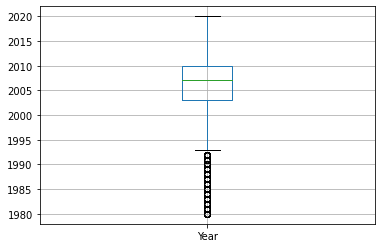

In [ ]:
vg_t("Year")

Medidas de Centralidade e Dispersão para  NA_Sales
media:  0.26466742981084057
desvio padrão:  0.8166830292990428
mediana:  0.08
variancia:  0.6669711703450613
moda:
 0    0.0
dtype: float64
boxplot para  NA_Sales


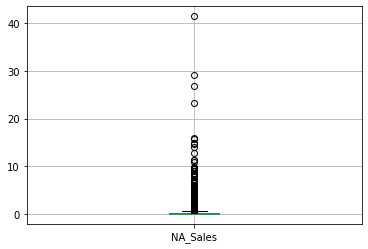

In [ ]:
vg_t("NA_Sales")

Medidas de Centralidade e Dispersão para  EU_Sales
media:  0.1466520062658483
desvio padrão:  0.5053512312869366
mediana:  0.02
variancia:  0.25537986696322285
moda:
 0    0.0
dtype: float64
boxplot para  EU_Sales


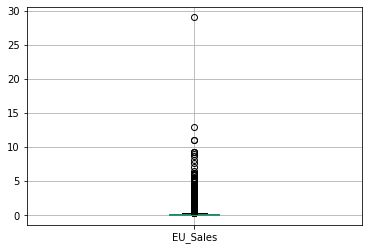

In [ ]:
vg_t("EU_Sales")

Medidas de Centralidade e Dispersão para  JP_Sales
media:  0.07778166044101108
desvio padrão:  0.30929064808213236
mediana:  0.0
variancia:  0.09566070499106545
moda:
 0    0.0
dtype: float64
boxplot para  JP_Sales


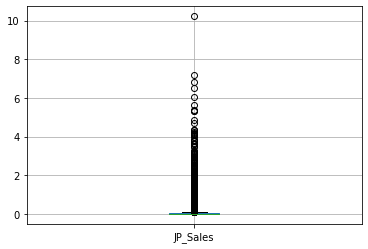

In [ ]:
vg_t("JP_Sales")

Medidas de Centralidade e Dispersão para  Other_Sales
media:  0.048063019640913515
desvio padrão:  0.18858840291278392
mediana:  0.01
variancia:  0.03556558571319453
moda:
 0    0.0
dtype: float64
boxplot para  Other_Sales


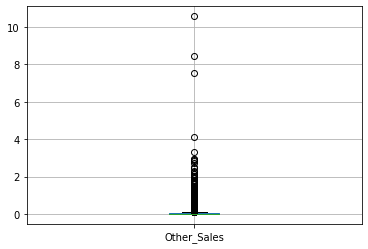

In [ ]:
vg_t("Other_Sales")

Medidas de Centralidade e Dispersão para  Global_Sales
media:  0.53744065550074
desvio padrão:  1.5550279355699022
mediana:  0.17
variancia:  2.4181118804027917
moda:
 0    0.02
dtype: float64
boxplot para  Global_Sales


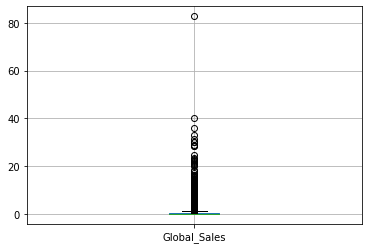

In [ ]:
vg_t("Global_Sales")

## 3. Limpeza e transformação dos dados necessários
para inicio do tratamento foi necessario limpar todos os NAN e linhas que continham nulo no dataset, para fluir melhor e evitar problema quando for mexer nas colunas.

In [ ]:
vg = vg.dropna()

Foi visto que seria necesssario, transformar a coluna Year em inteiro vendo que ela é flutuante.

In [ ]:
vg = vg[vg["Year"].notnull()]
vg = vg.astype({"Year":int})

## 4. Perguntas

### 4.1 Quais os gêneros mais presentes?

In [ ]:
vg["Genre"].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

Resposta: Logo é visto que o genero ação é o mais presente no conjunto de dados.

### 4.2 Plataformas nas quais tiveram mais vendas de jogos?

In [ ]:
vg.groupby("Platform").mean().sort_values(by="Global_Sales",ascending=False)[["Global_Sales"]]

,Global_Sales
Platform,
GB,2.622887
NES,2.561939
GEN,1.050370
SNES,0.837029
PS4,0.827679
X360,0.785737
2600,0.746293
PS3,0.728029
Wii,0.705279


Resposta: logo é visto que GB foi a plataforma com mais vendas global.

### 4.3 Quais jogos que venderam mais de 10.000.000 de cópias em 2 ou mais regiões do mundo?

In [ ]:
vg[(vg['NA_Sales'] >= 10) & (vg['EU_Sales'] >=10 ) | (vg['NA_Sales'] >=10 ) & (vg['JP_Sales'] >=10 ) | (vg['NA_Sales'] >=10 ) & (vg['Other_Sales'] >=10 ) 
| (vg['EU_Sales'] >=10 ) & (vg['JP_Sales'] >=10 ) | (vg['EU_Sales'] >=10 ) & (vg['Other_Sales'] >=10 ) | (vg['JP_Sales'] >=10 ) & (vg['Other_Sales'] >=10 )]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Resposta: Logo é visto que temos apenas 4 jogos que chegam a mais de 10 milhões de copias em mais de duas regiões.

### 4.4 Como podemos usar agrupamento para predizer o que vai acontecer na industria dos games com o passar dos anos ?

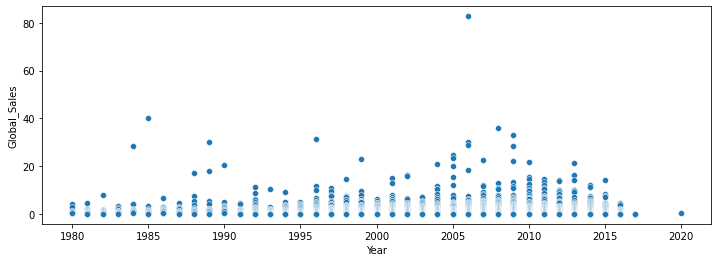

In [ ]:
g = sns.scatterplot(data=vg, x="Year", y="Global_Sales")
g.figure.set_figwidth(12)

In [ ]:
from sklearn.cluster import KMeans

grupos_vg = vg[["Year","Global_Sales"]]

kmeans = KMeans(n_clusters=2)
kmeans.fit(grupos_vg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

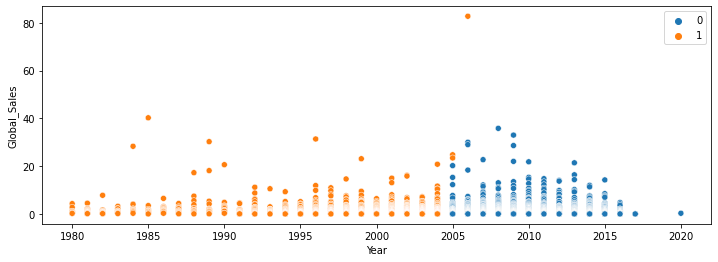

In [ ]:
g = sns.scatterplot(data=grupos_vg, x="Year", y="Global_Sales", hue=kmeans.labels_)
g.figure.set_figwidth(12)

In [ ]:
print(vg[kmeans.labels_ == 0]["Global_Sales"].sum())
print(vg[kmeans.labels_ == 1]["Global_Sales"].sum())

5325.1500000000015
3486.8199999999997


Reposta: Como podemos observar a partir 2005 teve um "Boom" dos games, pois passaram a ser mais acessiveis para todas as classes sociais.

## 5. Conclusão

### 5.1 Resultados encontrados

&nbsp; Olhando desde a exploração inicial que foi feita uma analise de medidas de centralidade e disperção do dataset foi visto uma grande variancia, logo quer dizer que existe uma grande descrepancia entre os elementos das linhas, pode ser visto isto nos boxplots. É uma boa analise a ser feita ate porque isto prova que existem jogos fora da curva do dataset que conseguem atingir outros patamares de vendas.

&nbsp; Notório ver que o jogo Wii Sports foi o jogo mais vendido como visto no dataset, por ser um jogo feito para a família, acabando sendo muito mais vendido que qualquer outro jogo. Mesmo o Wii Sport sendo o mais vendido, vemos que o gênero mais presente é ação. Mostrando que mesmo esportes sendo bastante vendido a popularidade e a busca pelos jogos de ação se mostra bem notável, possivelmente devido as grandes franquias de jogos de ação que a cada lançamento se torna mais popular, como a franquia da Rockstar Grand Theft Auto.

&nbsp; Foi mostrado tambem que existem poucos jogos que foram vendido mais de 10 milhões de copias em mais de duas regiões do mundo. Foi visto tambem que de acordo com o algoritimo de agrupamento k-means a grande explosão de vendas no mundo dos games foi a partir de 2005, onde claramente o desbloqueio do playstation 2 teve uma grande influencia nesses numeros, pois seus jogos passaram a ser mais acessiveis para todos os publicos.

### 5.2 Limitações


&nbsp; Existe um grande problema que encontramos no dataset, ele consiste em jogos com classificação de gênero errado e com apenas uma classificação, um exemplo que vemos na base de dados é o caso do fifa mostrada a seguir:

In [ ]:
vg["Name"][vg["Genre"] == "Action"].head(20)

16                         Grand Theft Auto V
17              Grand Theft Auto: San Andreas
23                         Grand Theft Auto V
24                Grand Theft Auto: Vice City
38                       Grand Theft Auto III
44                         Grand Theft Auto V
45       Pokemon HeartGold/Pokemon SoulSilver
51                        Grand Theft Auto IV
56                        Grand Theft Auto IV
82                             FIFA Soccer 13
90     Grand Theft Auto: Liberty City Stories
94       The Legend of Zelda: Ocarina of Time
100    The Legend of Zelda: Twilight Princess
115            Uncharted 3: Drake's Deception
119                Uncharted 2: Among Thieves
123                       Red Dead Redemption
127                       The Legend of Zelda
128                      Assassin's Creed III
134                       Red Dead Redemption
138                                    Driver
Name: Name, dtype: object

Logo visto no indice 82 FIFA Soccer 13 na área de ação

### 5.3 Trabalhos futuros e melhorias que podem ser feitas

&nbsp; Para trabalhos futuros com o dataset queremos acrescentar mais gráficos e mais manipulação com várias colunas. Além de querer trabalhar com novos datasets para se aprofundar no assunto.


&nbsp; Para melhorias, a sugestão a ser feita seria acrescentar mais de um gênero, porque normalmente os jogos tem mais de uma classificação de gênero.